In [ ]:
!nvidia-smi

Fri Aug 13 14:56:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [ ]:
import keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
train_path = '/content/drive/MyDrive/data healthcare/train'
valid_path = '/content/drive/MyDrive/data healthcare/test'

In [ ]:
inception = InceptionV3(input_shape= (150,150,3), weights = 'imagenet', include_top= False)

for layer in inception.layers:
  layer.trainable = False



x = Flatten()(inception.output)
x = Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

prediction = Dense(5, activation = 'softmax')(x)

model = Model(inputs = inception.input, outputs = prediction)

model.summary()

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = 'accuracy'
)

87916544/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 40,683,301
Trainable params: 18,880,517
Non-trainable params: 21,802,784
__________________________________________________________________________________________________


In [ ]:
train_datagen = ImageDataGenerator( rescale= 1./255,shear_range = 0.2, zoom_range = 0.2)

test_datagen = ImageDataGenerator(rescale= 1./255)


training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data healthcare/train', 
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set =  test_datagen.flow_from_directory('/content/drive/MyDrive/data healthcare/test',
                                             target_size = (150,150),
                                             batch_size =32,
                                             class_mode = 'categorical')

Found 16054 images belonging to 5 classes.
Found 3799 images belonging to 5 classes.


In [ ]:
inception_history= model.fit_generator(
    training_set, validation_data = test_set,
    epochs =5,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set) 
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
502/502 [==============================] - 8086s 16s/step - loss: 6.2782 - accuracy: 0.7862 - val_loss: 0.5402 - val_accuracy: 0.7870
Epoch 2/5
502/502 [==============================] - 319s 636ms/step - loss: 0.2990 - accuracy: 0.8919 - val_loss: 0.4137 - val_accuracy: 0.8523
Epoch 3/5
502/502 [==============================] - 319s 637ms/step - loss: 0.2595 - accuracy: 0.9063 - val_loss: 0.3818 - val_accuracy: 0.8521
Epoch 4/5
502/502 [==============================] - 314s 626ms/step - loss: 0.2352 - accuracy: 0.9124 - val_loss: 0.5049 - val_accuracy: 0.8294
Epoch 5/5
502/502 [==============================] - 311s 619ms/step - loss: 0.2305 - accuracy: 0.9155 - val_loss: 0.3783 - val_accuracy: 0.8581


In [ ]:
import matplotlib.pyplot as plt


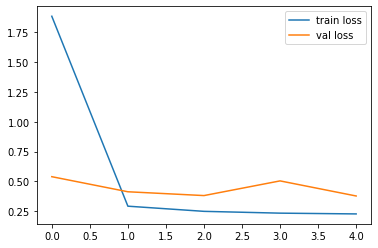

In [ ]:
plt.plot(inception_history.history['loss'], label = 'train loss')
plt.plot(inception_history.history['val_loss'], label = 'val loss')
plt.legend()


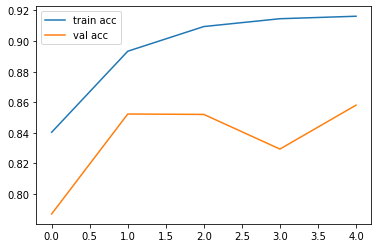

In [ ]:
plt.plot(inception_history.history['accuracy'], label = 'train acc')
plt.plot(inception_history.history['val_accuracy'], label = 'val acc')
plt.legend()